# SUPPORT VECTOR MACHINE

### Dataset Selection:
For this assignment, we'll utilize the widely recognized Mushroom Dataset
### Task 1: Exploratory Data Analysis (EDA)
1. Load the Mushroom dataset and perform fundamental data exploration.
2. Utilize histograms, box plots, or density plots to understand feature distributions.
3. Investigate feature correlations to discern relationships within the data.
### Task 2: Data Preprocessing
1. Encode categorical variables if necessary.
2. Split the dataset into training and testing sets.
### Task 3: Data Visualization
1. Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2. Visualize class distributions to gauge dataset balance or imbalance.
### Task 4: SVM Implementation
1. Implement a basic SVM classifier using Python libraries like scikit-learn.
2. Train the SVM model on the training data.
3. Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
### Task 5: Visualization of SVM Results
1. Visualize classification results on the testing data.
### Task 6: Parameter Tuning and Optimization
1. Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.
### Task 7: Comparison and Analysis
1. Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2. Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3. Discuss practical implications of SVM in real-world classification tasks.

### Task 1: Exploratory Data Analysis (EDA)
1.Load the Mushroom dataset and perform fundamental data exploration.

In [1]:
# Dataset loaded
import pandas as pd
data = pd.read_csv("mushroom.csv")

In [2]:
data.head(3)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884


In [3]:
# Data Exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
data.isnull().sum()


Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

2. Utilize histograms, box plots, or density plots to understand feature distributions.

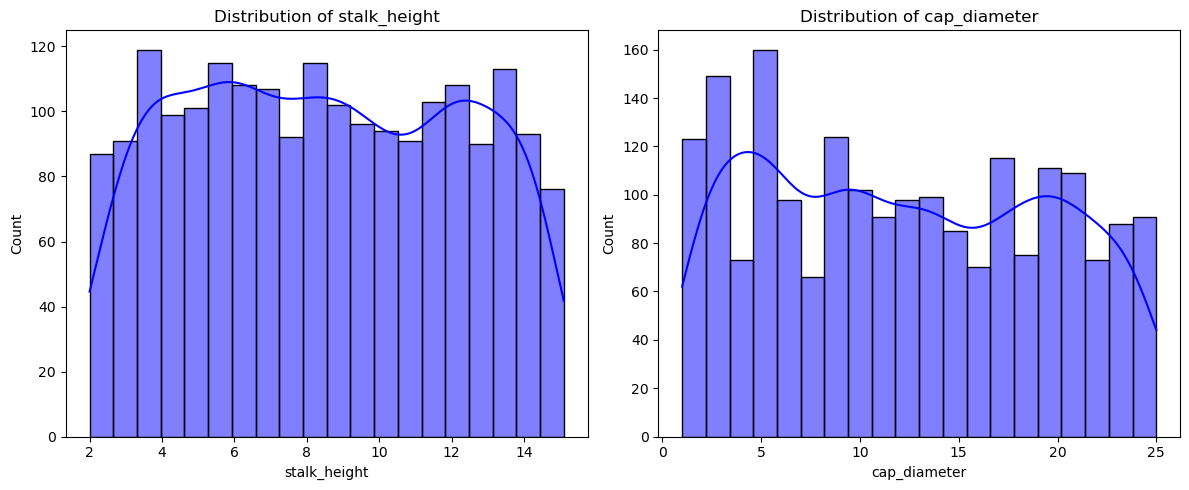

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ["stalk_height", "cap_diameter"]

plt.figure(figsize=(12, 5))
for i, feature in enumerate(num_features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data[feature], bins=20, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


3.Investigate feature correlations to discern relationships within the data.

In [6]:
# Converting categorical data to numerical for correlation analysis
from sklearn.preprocessing import LabelEncoder

df_encoded = data.copy()
for col in data.select_dtypes(include="object").columns:
    df_encoded[col] = LabelEncoder().fit_transform(data[col])

In [7]:
# Compute correlation matrix
correlation_matrix = df_encoded.corr()

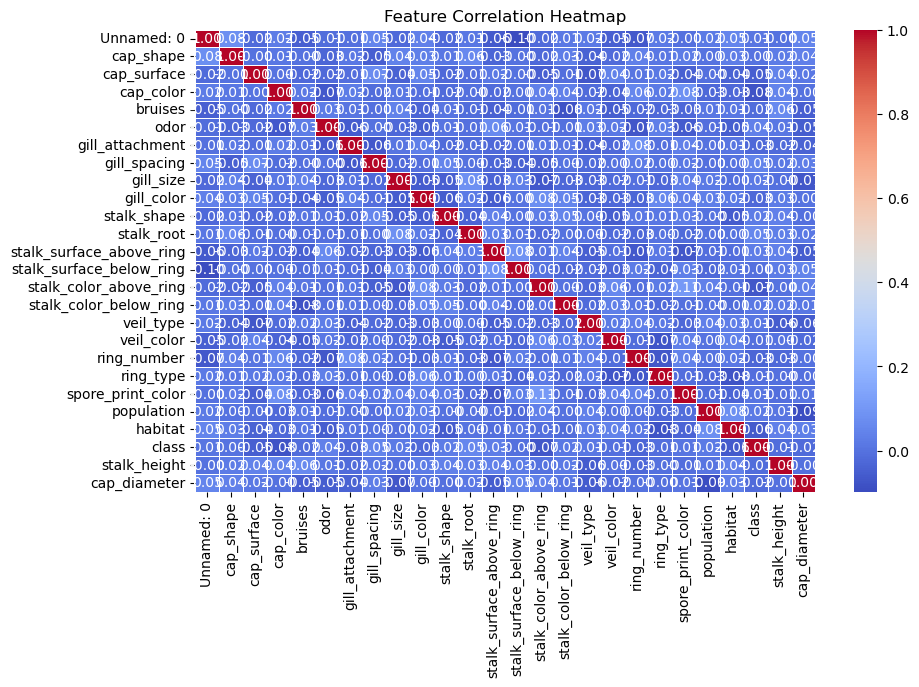

In [8]:
# plot
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Task 2: Data Preprocessing
1.Encode categorical variables if necessary.

###### Encoding categorical variables is done already during computing correlation matrix plot to understand realtionship.

2.Split the dataset into training and testing sets.

In [9]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("class", axis=1)
y = df_encoded["class"] # Here class is assumed as target which defines weather the mushroom is edible or poisonous.

In [10]:
# Dataset is been split into 80-20 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Task 3: Data Visualization
1. Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

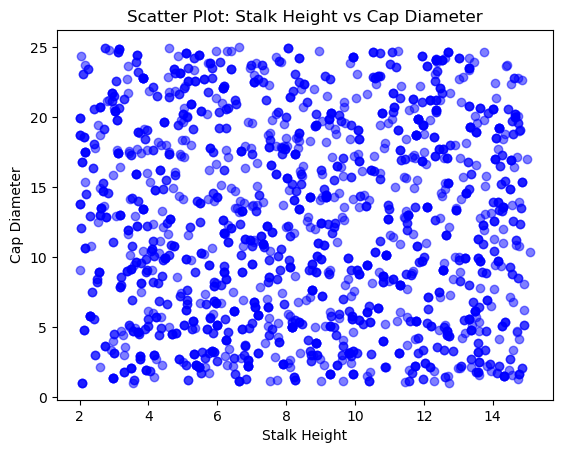

In [11]:
# Scatter plot
plt.scatter(data["stalk_height"], data["cap_diameter"], color="blue", alpha=0.5)
plt.xlabel("Stalk Height")
plt.ylabel("Cap Diameter")
plt.title("Scatter Plot: Stalk Height vs Cap Diameter")
plt.show()

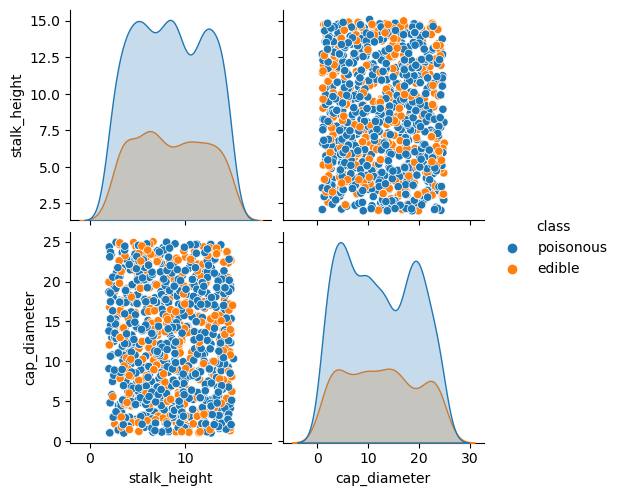

In [12]:
# Pair plot (only numerical features)
sns.pairplot(data[["stalk_height", "cap_diameter", "class"]], hue="class")
plt.show()

2.Visualize class distributions to gauge dataset balance or imbalance.

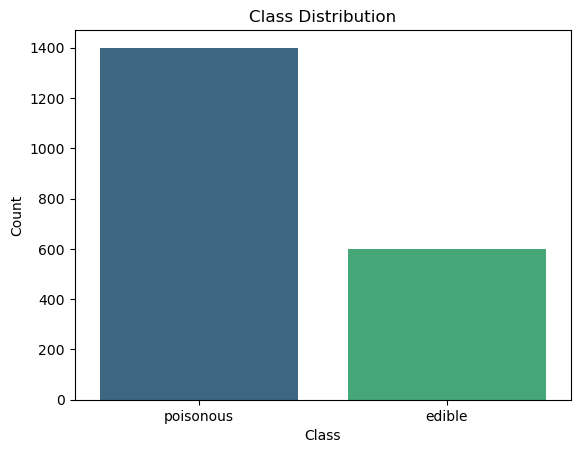

In [13]:
# Bar plot is generated for class distribution
sns.countplot(x="class", data=data, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [14]:
#checking if dataset is balanced or not 
data["class"].value_counts()

poisonous    1400
edible        600
Name: class, dtype: int64

###### The dataset is imbalanced .

### Task 4: SVM Implementation
1. Implement a basic SVM classifier using Python libraries like scikit-learn.

In [15]:
from sklearn.svm import SVC
model = SVC(C=10, gamma=0.01, kernel='rbf')
model.fit(X_train,y_train)

SVC(C=10, gamma=0.01)

3. Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
yhat_train = model.predict(X_train)
cm = confusion_matrix(y_train,yhat_train)
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       467
           1       1.00      1.00      1.00      1133

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [17]:
plt.figure(figsize=(3,2))
yhat_test = model.predict(X_test)
cm = confusion_matrix(y_test,yhat_test)
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       133
           1       0.87      0.93      0.90       267

    accuracy                           0.86       400
   macro avg       0.85      0.83      0.84       400
weighted avg       0.86      0.86      0.86       400



<Figure size 300x200 with 0 Axes>

### Task 5: Visualization of SVM Results
1. Visualize classification results on the testing data.

In [18]:
from sklearn.manifold import TSNE
tmodel = TSNE(n_components=2)
tdata = tmodel.fit_transform(X)
tdata

array([[ 69.88433   ,  -0.45199597],
       [ 38.703316  , -40.51525   ],
       [-27.17625   , -36.553394  ],
       ...,
       [-44.418972  , -46.282505  ],
       [-31.826075  ,  15.959302  ],
       [ 54.516346  , -40.577328  ]], dtype=float32)

In [19]:
tdf = pd.DataFrame(data=tdata, columns=['c1','c2'])
tdf['class'] = data['class']
tdf

,c1,c2,class
0,69.884331,-0.451996,poisonous
1,38.703316,-40.515251,edible
2,-27.176250,-36.553394,poisonous
3,-35.540684,-46.701675,poisonous
4,25.774828,42.698215,poisonous
...,...,...,...
1995,43.487820,39.607040,poisonous
1996,68.805862,-3.494680,poisonous
1997,-44.418972,-46.282505,poisonous
1998,-31.826075,15.959302,poisonous


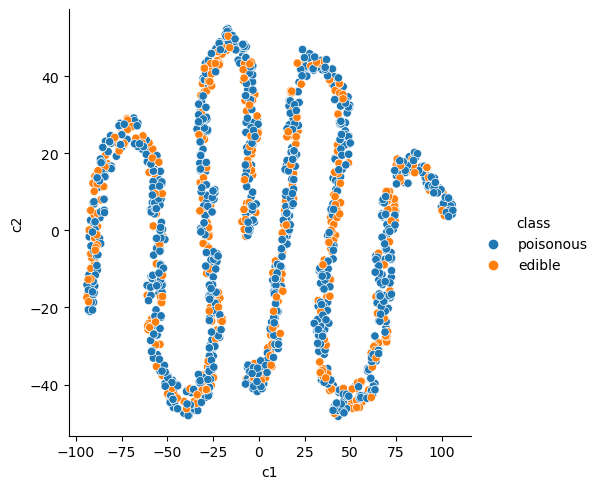

In [20]:
sns.relplot(data=tdf, x='c1',y='c2',kind='scatter',hue='class')
plt.show()

### Task 6: Parameter Tuning and Optimization
1. Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [21]:
model = SVC()

In [22]:
parameters ={
            'C': [0.5,0.6,1.0,1.1,1.5],
        'gamma':[0.1,0.01,1]
}

In [23]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model, param_grid=parameters, cv=5, scoring='accuracy')
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 0.6, 1.0, 1.1, 1.5],
                         'gamma': [0.1, 0.01, 1]},
             scoring='accuracy')

In [24]:
cv.best_params_

{'C': 0.6, 'gamma': 0.1}

### Task 7: Comparison and Analysis
1. Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Standardize features for better SVM performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, C=0.6, gamma=0.1)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)

    results[kernel] = {'accuracy': accuracy, 'report': report}

# Print results
for kernel, result in results.items():
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:\n", result['report'])
    print("-" * 50)


Kernel: linear
Accuracy: 0.6675
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.83      0.50      0.40       400
weighted avg       0.78      0.67      0.53       400

--------------------------------------------------
Kernel: poly
Accuracy: 0.8575
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.77       133
           1       0.88      0.92      0.90       267

    accuracy                           0.86       400
   macro avg       0.85      0.83      0.84       400
weighted avg       0.86      0.86      0.86       400

--------------------------------------------------
Kernel: rbf
Accuracy: 0.8050
Classification Report:
               precision    recall  f1-score   support

           0       1.00   

###### 2. Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
+ SVM is powerful for binary classification (edible vs. poisonous) with non-linear relationships but may not be the best choice if interpretability or scalability is critical. Decision Trees or Random Forests might provide similar accuracy with better interpretability.

###### 3. Discuss practical implications of SVM in real-world classification tasks.
+ SVM is widely used in real-world classification tasks like medical diagnosis, text classification, image recognition, and fraud detection due to its effectiveness in high-dimensional and non-linear data. It performs well on small to medium-sized datasets but struggles with large-scale data due to high computational costs. While powerful, it requires careful kernel selection and hyperparameter tuning for optimal performance.